In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# function that get source and destination
pass parameter of index = 0 to get source pass index = 1 to get destination

In [9]:
def sourcDest(value,index):
    return value.split(',')[index].split(': ')[1].split("'")[1]

# Handling Price

In [10]:
def repl(price):
    return price.replace(",","")

In [11]:
def retrnNumberOfStops(x):
    if(x[0] == 'n'):
        return 0
    else: 
        return int(x[0])

In [12]:
def handlingTimeTaken(x):
    hours=""
    index = 0
    minutes =""
    for i in range(0,len(x)):
        if(x[i] == 'h'):
            index = i 
            hours = x[:i]
            break
    for i in range(0,len(x)):
        if(x[i]=='m'):
            minutes = x[index + 2:i]
            break
    allTimes = ""
    if (minutes == ""):
        allTime = hours
    else:
        minutes = str(int(minutes) / 60)
        allTime=  hours + (minutes[1:])
    return float(allTime)

# function that get source and destination
pass parameter of index = 0 to get source pass index = 1 to get destination

In [13]:
def getCity(value,index):
    return value.split(',')[index].split(': ')[1].split("'")[1]

In [14]:
def getDistance(value):
    source = getCity(value,0)
    destination = getCity(value,1)
    index1 = cities.index(source)
    index2 = cities.index(destination)
    return distanceKm((latitude[index1],longitude[index1]),(latitude[index2],longitude[index2]))


In [15]:
def distanceKm(loc1,loc2):
    from haversine import haversine, Unit
    source = (loc1[0], loc1[1]) # (lat, lon)
    destination = (loc2[0], loc2[1])
    return haversine(source, destination)

# Check weekend Or Not 

In [16]:
def isWeekEndOrNot(day):
    if(day == 'Saturday' or day == 'Monday'):
        return 1
    return 0 


# Function get location by name of city 

In [17]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
  
longitude = []
latitude = []
   
def findLocation(city):
    try:
        geolocator = Nominatim(user_agent="airline")
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findLocation(city)    

# Printing Evaluation 

In [18]:
def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [19]:
df = pd.read_csv('airline-price-prediction.csv')

In [20]:
df.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,price
0,5/3/2022,Vistara,UK,812,9:45,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...","56,588"
1,18-03-2022,Vistara,UK,975,5:45,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}","59,649"
2,9/3/2022,GO FIRST,G8,7537,14:30,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}","3,916"
3,15-03-2022,GO FIRST,G8,287,10:40,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}","6,031"
4,22-03-2022,Vistara,UK,826,12:30,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}","7,081"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240208 entries, 0 to 240207
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        240208 non-null  object
 1   airline     240208 non-null  object
 2   ch_code     240208 non-null  object
 3   num_code    240208 non-null  int64 
 4   dep_time    240208 non-null  object
 5   time_taken  240208 non-null  object
 6   stop        240208 non-null  object
 7   arr_time    240208 non-null  object
 8   type        240208 non-null  object
 9   route       240208 non-null  object
 10  price       240208 non-null  object
dtypes: int64(1), object(10)
memory usage: 20.2+ MB


In [22]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
time_taken    0
stop          0
arr_time      0
type          0
route         0
price         0
dtype: int64

In [23]:
df.describe()

,num_code
count,240208.000000
mean,1422.222903
std,1980.788784
min,101.000000
25%,637.000000
50%,818.000000
75%,927.000000
max,9991.000000


In [24]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'time_taken',
       'stop', 'arr_time', 'type', 'route', 'price'],
      dtype='object')

In [25]:
import datetime
dt = df['date']
days = []
for i in dt:
    if('/' in i):
        day, month, year = (int(x) for x in i.split('/'))
        ans = datetime.date(year, month, day)
        days.append(ans.strftime("%A"))
    else:
        day, month, year = (int(x) for x in i.split('-'))
        ans = datetime.date(year, month, day)
        days.append(ans.strftime("%A"))
df['Days'] = days
print(df['Days'])

0          Saturday
1            Friday
2         Wednesday
3           Tuesday
4           Tuesday
            ...    
240203       Friday
240204      Tuesday
240205    Wednesday
240206       Friday
240207       Friday
Name: Days, Length: 240208, dtype: object


In [26]:
df['source'] = df['route'].apply(sourcDest,args=[0])

In [27]:
df['destination'] = df['route'].apply(sourcDest,args=[1])

In [28]:
df['Day'] = pd.to_datetime(df['date']).dt.day

In [29]:
df['Month'] = pd.to_datetime(df['date']).dt.month

In [30]:
df['price'] = pd.to_numeric(df['price'].apply(repl))

In [31]:
df['stop'] = df['stop'].apply(retrnNumberOfStops)
df['stop']

0         1
1         1
2         1
3         1
4         1
         ..
240203    1
240204    1
240205    0
240206    1
240207    1
Name: stop, Length: 240208, dtype: int64

In [32]:
df['time_taken'] = df['time_taken'].apply(handlingTimeTaken)
df['time_taken']

0         10.166667
1          6.500000
2          8.166667
3          9.666667
4          7.416667
            ...    
240203     9.416667
240204    17.333333
240205     2.916667
240206    28.250000
240207    19.500000
Name: time_taken, Length: 240208, dtype: float64

# Applay this function to get column of source and distination    

In [33]:
df['source'] = df['route'].apply(getCity,args=[0])
df['destination'] = df['route'].apply(getCity,args=[1])

# get unique of cities 

In [34]:
cities = list(df['source'].unique())

In [35]:
#pip install geopy

In [36]:
for i in cities:  
    if findLocation(i) != None:
        loc = findLocation(i)
        longitude.append(loc.longitude)
        latitude.append(loc.latitude)   
        
        print(f"city of {i} \n latitude: {loc.latitude}\n longitude: {loc.longitude}")
        print("*"*30)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

city of Bangalore 
 latitude: 12.9767936
 longitude: 77.590082
******************************
city of Delhi 
 latitude: 28.6517178
 longitude: 77.2219388
******************************
city of Mumbai 
 latitude: 19.0759899
 longitude: 72.8773928
******************************
city of Chennai 
 latitude: 13.0836939
 longitude: 80.270186
******************************
city of Hyderabad 
 latitude: 17.360589
 longitude: 78.4740613
******************************
city of Kolkata 
 latitude: 22.5414185
 longitude: 88.35769124388872
******************************


In [37]:
pip install haversine

In [38]:
df['distance'] = df['route'].apply(getDistance)

In [39]:
df = df.drop('route',axis=1)

In [40]:
df=df.drop('num_code', axis='columns')

In [41]:
df=df.drop('dep_time', axis='columns')

In [42]:
df=df.drop('arr_time', axis='columns')

In [43]:
df['Weekends'] = df['Days'].apply(isWeekEndOrNot)
df['Weekends']

0         1
1         0
2         0
3         0
4         0
         ..
240203    0
240204    0
240205    0
240206    0
240207    0
Name: Weekends, Length: 240208, dtype: int64

In [44]:
df_2= df.copy()

In [45]:
df_2.head()

,date,airline,ch_code,time_taken,stop,type,price,Days,source,destination,Day,Month,distance,Weekends
0,5/3/2022,Vistara,UK,10.166667,1,business,56588,Saturday,Bangalore,Hyderabad,3,5,496.597100,1
1,18-03-2022,Vistara,UK,6.500000,1,business,59649,Friday,Delhi,Hyderabad,18,3,1262.009188,0
2,9/3/2022,GO FIRST,G8,8.166667,1,economy,3916,Wednesday,Mumbai,Hyderabad,3,9,621.089378,0
3,15-03-2022,GO FIRST,G8,9.666667,1,economy,6031,Tuesday,Mumbai,Delhi,15,3,1152.469723,0
4,22-03-2022,Vistara,UK,7.416667,1,economy,7081,Tuesday,Chennai,Kolkata,22,3,1355.257062,0


# Lable Encoding

In [46]:
les = {}
for i in (["type","airline","ch_code","source","destination"]) :
    les[i] = LabelEncoder()
    df[i] = les[i].fit_transform(df[i]) 

# Visualision Part

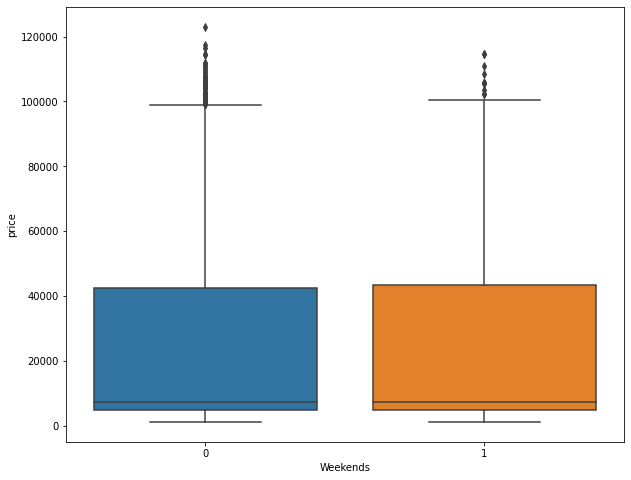

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Weekends', y='price', data=df)

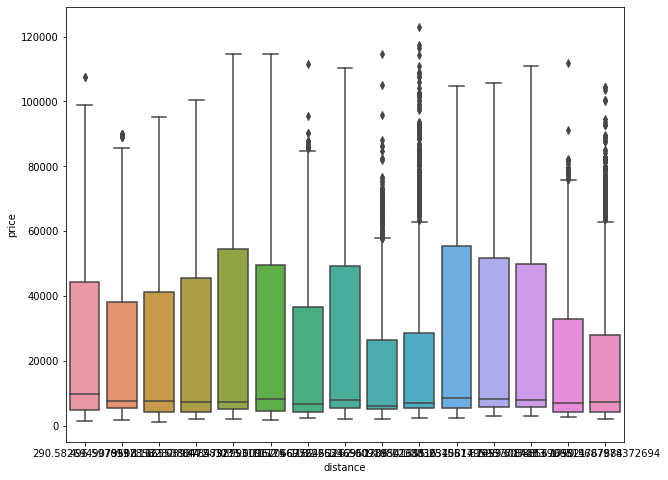

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(x='distance', y='price', data=df)

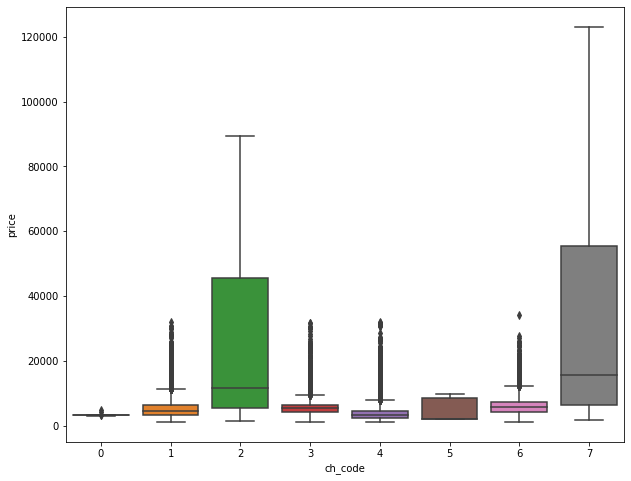

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x='ch_code', y='price', data=df)

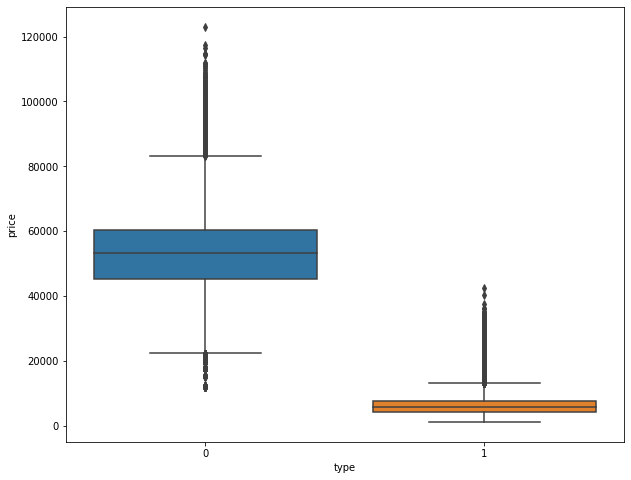

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x='type', y='price', data=df)

In [51]:
df['Days']

0          Saturday
1            Friday
2         Wednesday
3           Tuesday
4           Tuesday
            ...    
240203       Friday
240204      Tuesday
240205    Wednesday
240206       Friday
240207       Friday
Name: Days, Length: 240208, dtype: object

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Days'), Text(0.5, 1.0, 'Price Trends')]

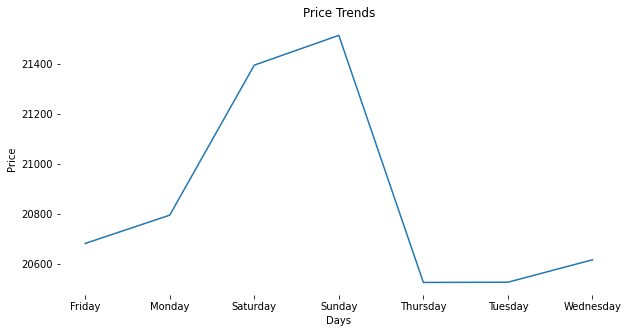

In [52]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('Days').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Days', ylabel='Price', title='Price Trends')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Day'), Text(0.5, 1.0, 'Price Trends')]

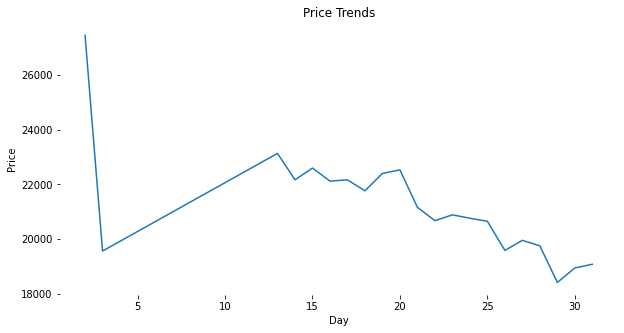

In [53]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('Day').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Day', ylabel='Price', title='Price Trends')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'distance'),
 Text(0.5, 1.0, 'Price Trends')]

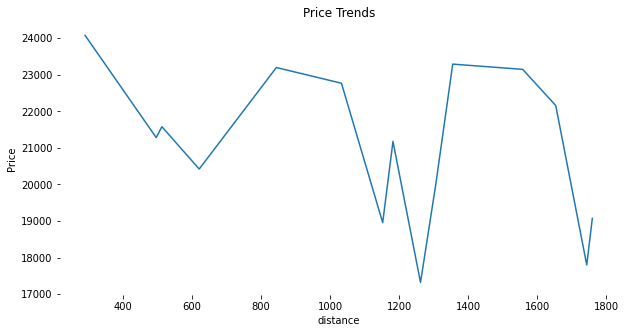

In [54]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('distance').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='distance', ylabel='Price', title='Price Trends')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Price Trends')]

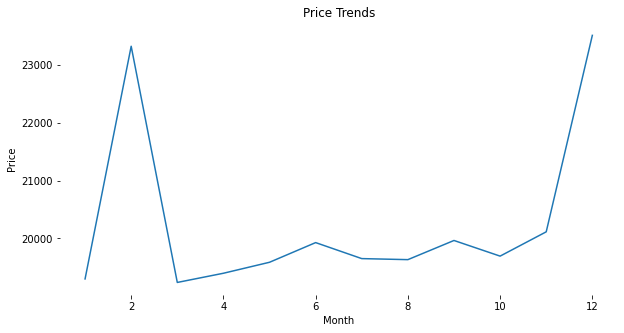

In [55]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('Month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Weekends'),
 Text(0.5, 1.0, 'Price Trends')]

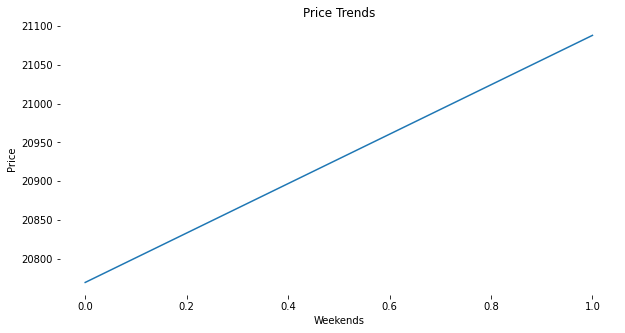

In [56]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('Weekends').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Weekends', ylabel='Price', title='Price Trends')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'type'), Text(0.5, 1.0, 'Price Trends')]

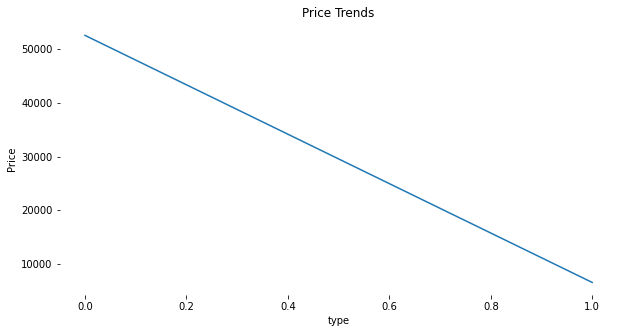

In [57]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('type').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='type', ylabel='Price', title='Price Trends')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'time_taken'),
 Text(0.5, 1.0, 'Price Trends')]

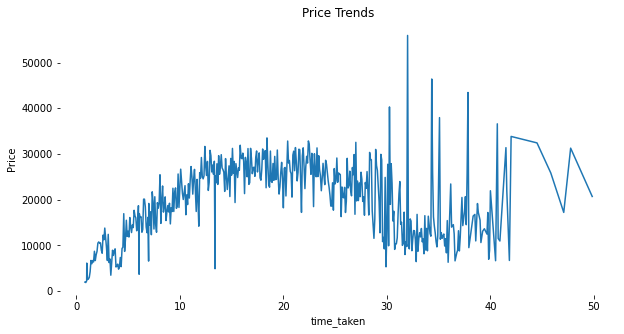

In [58]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('time_taken').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='time_taken', ylabel='Price', title='Price Trends')

In [59]:
df.head()

,date,airline,ch_code,time_taken,stop,type,price,Days,source,destination,Day,Month,distance,Weekends
0,5/3/2022,7,7,10.166667,1,0,56588,Saturday,0,3,3,5,496.597100,1
1,18-03-2022,7,7,6.500000,1,0,59649,Friday,2,3,18,3,1262.009188,0
2,9/3/2022,2,3,8.166667,1,1,3916,Wednesday,5,3,3,9,621.089378,0
3,15-03-2022,2,3,9.666667,1,1,6031,Tuesday,5,2,15,3,1152.469723,0
4,22-03-2022,7,7,7.416667,1,1,7081,Tuesday,1,4,22,3,1355.257062,0


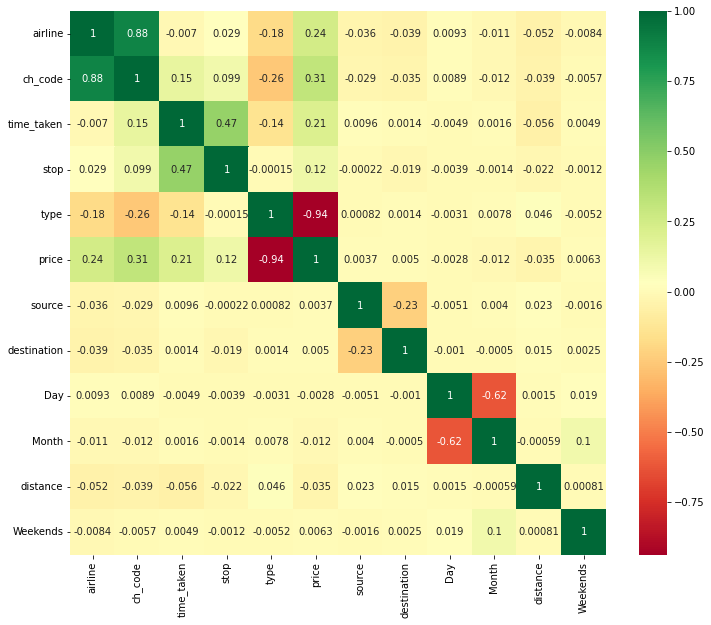

In [60]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [61]:
df_2.head()

,date,airline,ch_code,time_taken,stop,type,price,Days,source,destination,Day,Month,distance,Weekends
0,5/3/2022,Vistara,UK,10.166667,1,business,56588,Saturday,Bangalore,Hyderabad,3,5,496.597100,1
1,18-03-2022,Vistara,UK,6.500000,1,business,59649,Friday,Delhi,Hyderabad,18,3,1262.009188,0
2,9/3/2022,GO FIRST,G8,8.166667,1,economy,3916,Wednesday,Mumbai,Hyderabad,3,9,621.089378,0
3,15-03-2022,GO FIRST,G8,9.666667,1,economy,6031,Tuesday,Mumbai,Delhi,15,3,1152.469723,0
4,22-03-2022,Vistara,UK,7.416667,1,economy,7081,Tuesday,Chennai,Kolkata,22,3,1355.257062,0


# One Hot Encoding 

In [62]:
onehot = OneHotEncoder(handle_unknown='ignore')

In [63]:
df_2['source'].unique()

array(['Bangalore', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [64]:
onehotout=pd.DataFrame(onehot.fit_transform(df_2[['type']]).toarray())
onehotout.columns = df_2['type'].unique()
df_2 = df_2.join(onehotout)
onehotout=pd.DataFrame(onehot.fit_transform(df_2[['airline']]).toarray())
onehotout.columns = df_2['airline'].unique()
df_2 = df_2.join(onehotout)
onehotout=pd.DataFrame(onehot.fit_transform(df_2[['Days']]).toarray())
onehotout.columns = df_2['Days'].unique()
df_2 = df_2.join(onehotout)
onehot.fit(df_2[['source']])
onehotout=pd.DataFrame(onehot.transform(df_2[['source']]).toarray())
onehotout.columns = ['src_Bangalore', 'src_Delhi', 'src_Mumbai', 'src_Chennai', 'src_Hyderabad', 'src_Kolkata']
df_2 = df_2.join(onehotout)
onehotout=pd.DataFrame(onehot.transform(df_2[['destination']]).toarray())
onehotout.columns = ['dst_Bangalore', 'dst_Delhi', 'dst_Mumbai', 'dst_Chennai', 'dst_Hyderabad', 'dst_Kolkata']
df_2 = df_2.join(onehotout)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- destination
Feature names seen at fit time, yet now missing:
- source

  warnings.warn(message, FutureWarning)


In [65]:
df_2 = df_2.drop(['date','ch_code','type','airline','source','destination','Days'],axis=1)

In [66]:
df_2.head()

,time_taken,stop,price,Day,Month,distance,Weekends,business,economy,Vistara,...,src_Mumbai,src_Chennai,src_Hyderabad,src_Kolkata,dst_Bangalore,dst_Delhi,dst_Mumbai,dst_Chennai,dst_Hyderabad,dst_Kolkata
0,10.166667,1,56588,3,5,496.597100,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6.500000,1,59649,18,3,1262.009188,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.166667,1,3916,3,9,621.089378,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9.666667,1,6031,15,3,1152.469723,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7.416667,1,7081,22,3,1355.257062,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


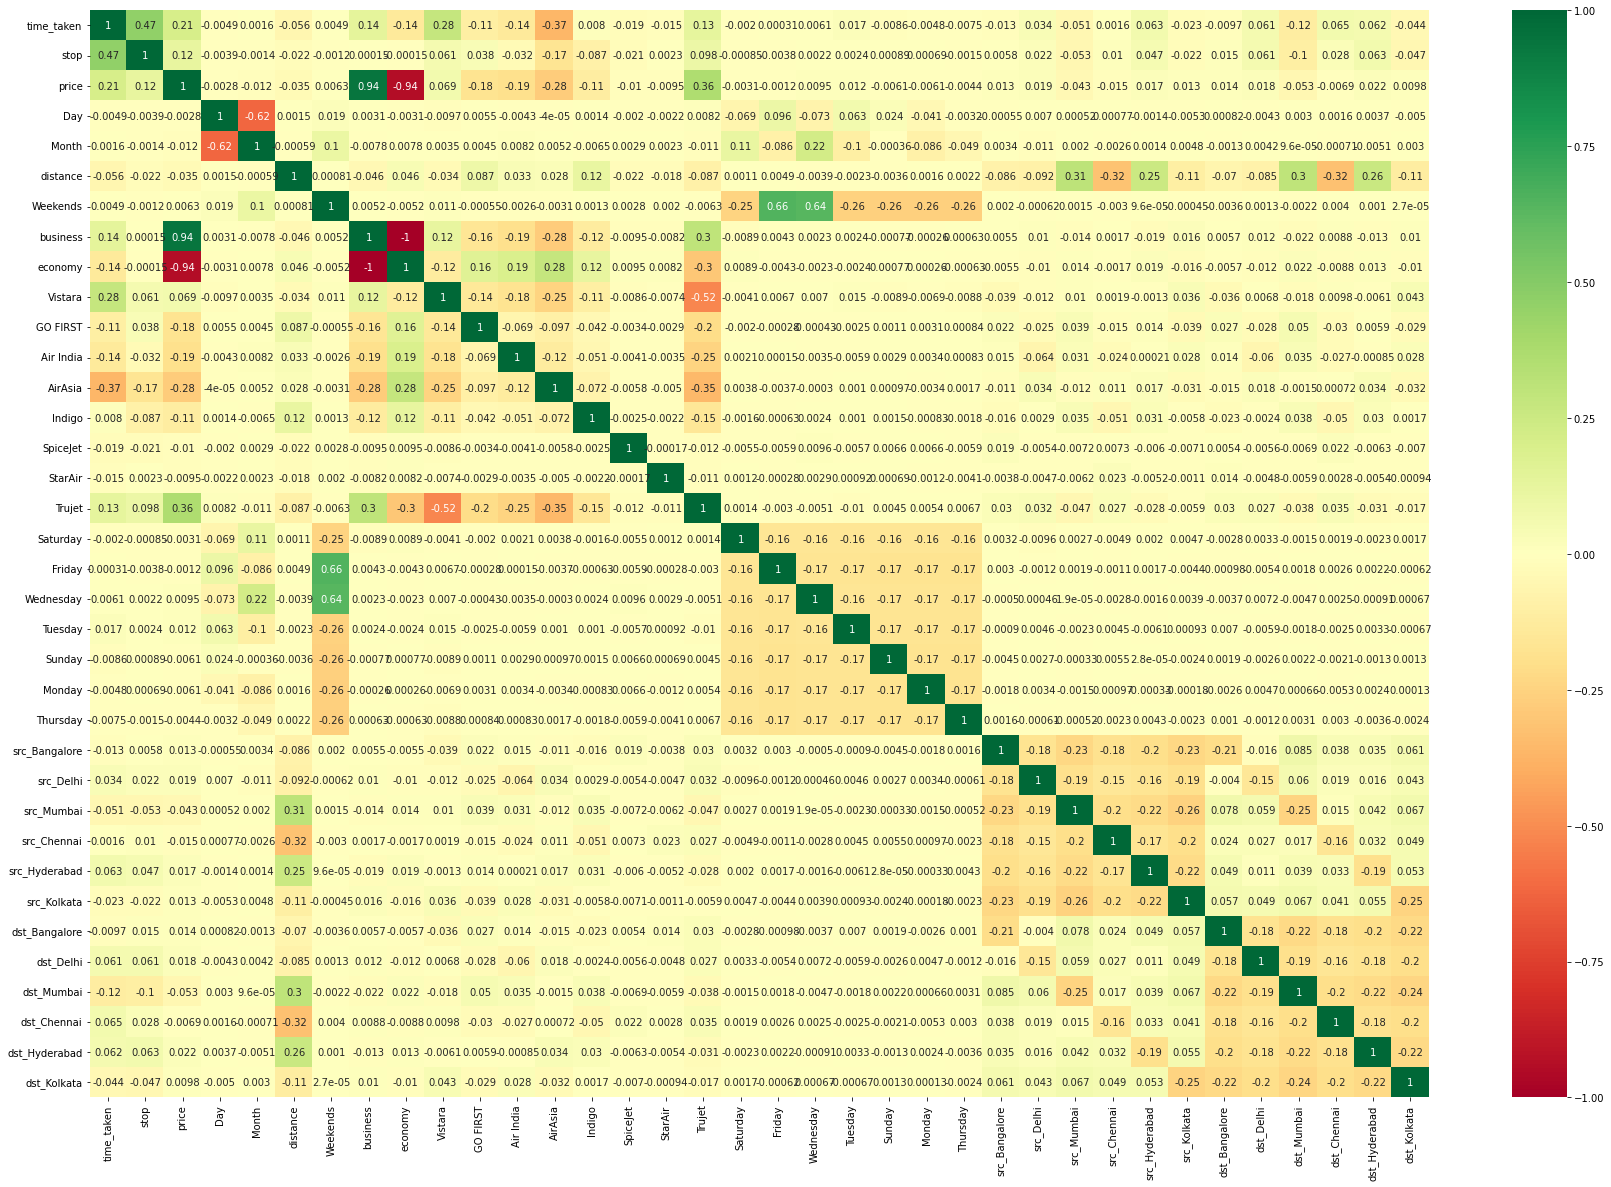

In [67]:
plt.figure(figsize=(30,20))
p=sns.heatmap(df_2.corr(), annot=True,cmap ='RdYlGn')

In [68]:
df_2.columns

Index(['time_taken', 'stop', 'price', 'Day', 'Month', 'distance', 'Weekends',
       'business', 'economy', 'Vistara', 'GO FIRST', 'Air India', 'AirAsia',
       'Indigo', 'SpiceJet', 'StarAir', 'Trujet', 'Saturday', 'Friday',
       'Wednesday', 'Tuesday', 'Sunday', 'Monday', 'Thursday', 'src_Bangalore',
       'src_Delhi', 'src_Mumbai', 'src_Chennai', 'src_Hyderabad',
       'src_Kolkata', 'dst_Bangalore', 'dst_Delhi', 'dst_Mumbai',
       'dst_Chennai', 'dst_Hyderabad', 'dst_Kolkata'],
      dtype='object')

In [69]:
X = df_2.drop('price', axis='columns')
y = df_2.price

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
print(X_train.shape)
print(X_test.shape)

(192166, 35)
(48042, 35)


# Model builiding

### Polynomial Regression and Normalization

In [74]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

In [75]:
pipe_info = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False,degree=2)), ('Linear Model', LinearRegression())]
pipe = Pipeline(pipe_info)

In [76]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Normalize', StandardScaler()),
                ('Polynomial Features', PolynomialFeatures(include_bias=False)),
                ('Linear Model', LinearRegression())])

In [77]:
yhat_test_pipe = pipe.predict(X_test)
yhat_train_pipe = pipe.predict(X_train)
yhat_test_pipe_df = pd.DataFrame(yhat_test_pipe, columns=['predicted_price'])

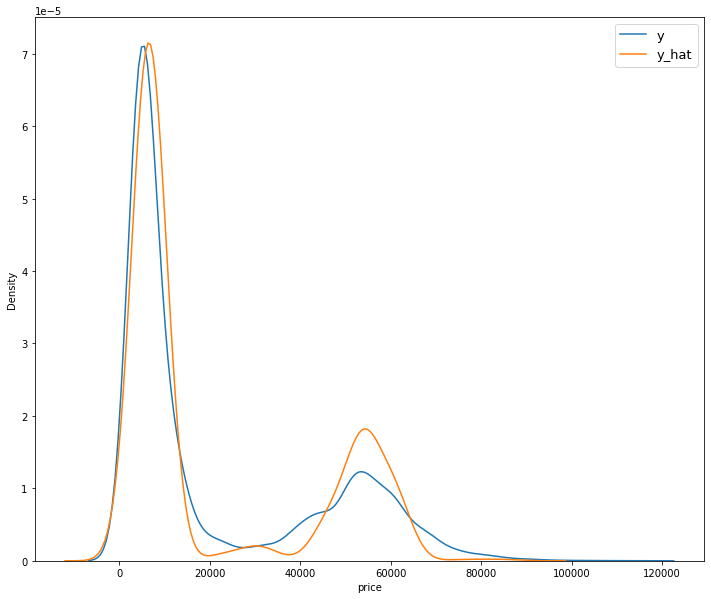

In [78]:
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_test_pipe_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

In [79]:
pipe.score(X_test, y_test)

0.9431764952941397

In [80]:
error = abs(round(pipe.score(X_test, y_test) - pipe.score(X_train, y_train), 4))
error

0.0015

In [92]:
print_evaluate(y_train,yhat_train_pipe, train=True)
print_evaluate(y_test,yhat_test_pipe, train=False)

========Training Result=======
MAE:  3424.8090953660753
MSE:  28509130.307419237
RMSE:  5339.394189177199
R2 Square:  0.9446464499897875
=========Testing Result=======
MAE:  3483.8477888040998
MSE:  29306643.97533333
RMSE:  5413.561117724019
R2 Square:  0.9431764952941397


### Ridge Regression

In [81]:
pipe_info_ridge = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False,degree=2,)), ('Regression', Ridge())]
ridge_pipe = Pipeline(pipe_info_ridge)

In [82]:
ridge_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Normalize', 'Polynomial Features', 'Regression', 'Normalize__copy', 'Normalize__with_mean', 'Normalize__with_std', 'Polynomial Features__degree', 'Polynomial Features__include_bias', 'Polynomial Features__interaction_only', 'Polynomial Features__order', 'Regression__alpha', 'Regression__copy_X', 'Regression__fit_intercept', 'Regression__max_iter', 'Regression__normalize', 'Regression__positive', 'Regression__random_state', 'Regression__solver', 'Regression__tol'])

In [83]:
hyper_params_dict = {'Regression__alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]}

In [84]:
grid = GridSearchCV(estimator=ridge_pipe, param_grid=hyper_params_dict, scoring='r2', n_jobs=-1, cv=4)

In [85]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Normalize', StandardScaler()),
                                       ('Polynomial Features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('Regression', Ridge())]),
             n_jobs=-1,
             param_grid={'Regression__alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1,
                                               10, 100, 1000, 10000]},
             scoring='r2')

In [86]:
grid.best_params_

{'Regression__alpha': 10}

In [87]:
best_ridge = grid.best_estimator_
best_ridge

Pipeline(steps=[('Normalize', StandardScaler()),
                ('Polynomial Features', PolynomialFeatures(include_bias=False)),
                ('Regression', Ridge(alpha=10))])

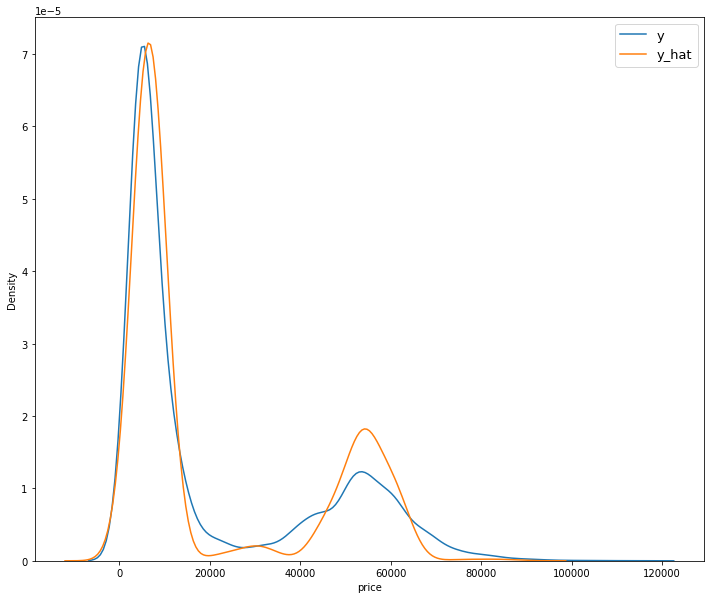

In [88]:
yhat_ridge_test = best_ridge.predict(X_test)
yhat_ridge_train = best_ridge.predict(X_train)
yhat_ridge_df = pd.DataFrame(yhat_ridge_test, columns=['predicted_price'])
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_ridge_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

In [89]:
grid.best_score_

0.9444604681800308

In [90]:
error = abs(round(grid.score(X_test, y_test) - grid.score(X_train, y_train), 4))
error

0.0015

In [91]:
print_evaluate(y_train, yhat_ridge_train, train=True)
print_evaluate(y_test,yhat_ridge_test, train=False)

========Training Result=======
MAE:  3424.8150269336343
MSE:  28509135.62804533
RMSE:  5339.394687419664
R2 Square:  0.9446464396592184
=========Testing Result=======
MAE:  3483.8729984318775
MSE:  29306734.35270981
RMSE:  5413.569465030426
R2 Square:  0.9431763200588148


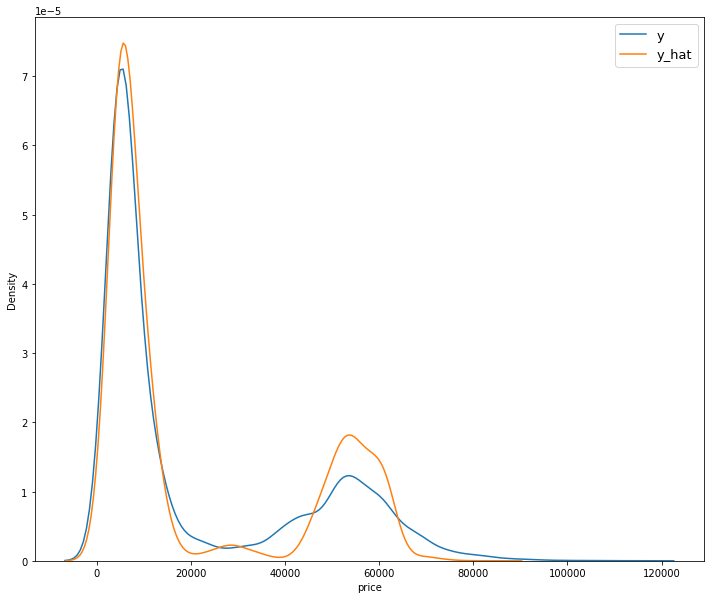

In [93]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR

model = GBR.fit(X_train,y_train)

GBR_train= model.score(X_train,y_train)
GBR_train

GBR_test = model.predict(X_test)
GBR_test

model.score(X_test, y_test)

error = abs(round(model.score(X_test, y_test) - model.score(X_train, y_train), 4))
error

yhat_test_pipe_df = pd.DataFrame(GBR_test, columns=['predicted_price'])

plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_test_pipe_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);



In [94]:
error = abs(round(model.score(X_test, y_test) - model.score(X_train, y_train), 4))
error

0.0009

In [95]:
GBR_train= model.score(X_train,y_train)
GBR_train


0.9539791870602411

In [97]:
model.score(X_test,y_test)

0.9531097277323605